In [211]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [351]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [352]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [353]:
#. pd.set_option('display.max_columns', 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [354]:
df = df[df['_STATE'].isin([9,34,36])]
df['_STATE'] = df['_STATE'].replace({9.:'CT', 34.:'NJ', 36.:'NY'})

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [355]:
zero_dict = {88:0, 
             77: np.nan,
             99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)
df.dropna(subset=['PHYSHLTH'], inplace=True)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

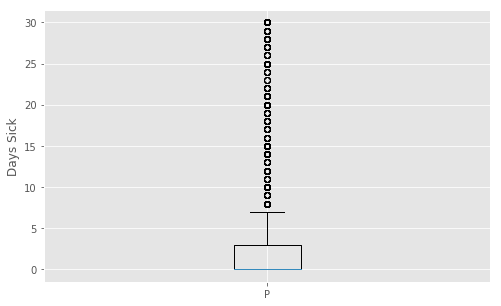

In [356]:
fig, ax = plt.subplots(figsize=(8,5))

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()


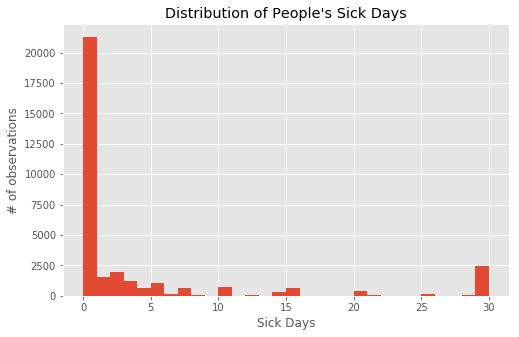

In [357]:
# graphic showing the histogram of data
fig, ax = plt.subplots(figsize=(8,5))
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=30)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

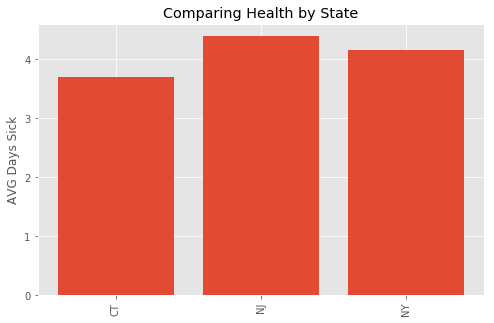

In [358]:
# code to calculate the average number of sick days by state

means = df.groupby('_STATE')['PHYSHLTH'].mean()

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(states, means)
ax.set_xticklabels(means.index, rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

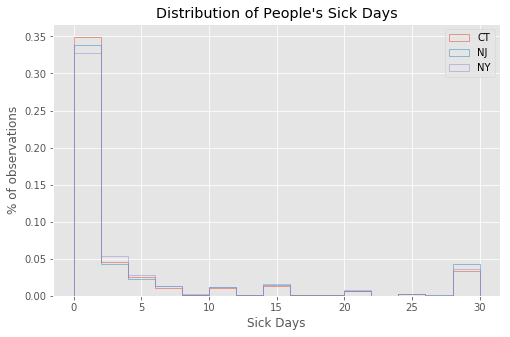

In [359]:
# graphic showing the histogram of data

fig, ax = plt.subplots(figsize=(8,5))
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']=='CT']['PHYSHLTH'], bins=15, density=True, histtype='step', label='CT')
ax.hist(df[df['_STATE']=='NJ']['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']=='NY']['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

ax.set_xlabel('Sick Days')
ax.set_ylabel('% of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [360]:
# code to create new colum for chronically sick

def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
    
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

#df['CHRONIC'] = np.where(df['PHYSHLTH']>=15, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'chronic sick' in each state. 

In [361]:
chr_groups = df.groupby('_STATE')['CHRON_SICK'].value_counts(normalize=True)
chr_groups = chr_groups[chr_groups.index.isin([1], level=1)]

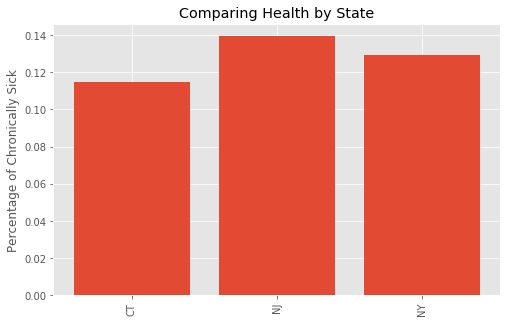

In [388]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots(figsize=(8,5))

# Plot a bar-chart of gold medals as a function of country
ax.bar([i[0] for i in chr_groups.index], chr_groups.values)

# Set labels and title
ax.set_xticklabels([i[0] for i in chr_groups.index], rotation=90)
ax.set_ylabel("Percentage of Chronically Sick")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [373]:
zero_dict = {3:'Non-Smoker', 
            2: 'Some Days',
            1: 'Every Day',
            7: 'Dont know',
            9: 'Refused'}

df['smoking_cat'] = df['SMOKDAY2'].replace(zero_dict)
df.dropna(subset=['smoking_cat'], inplace=True)

In [386]:
smoking_avg = df['smoking_cat'].value_counts()/df['smoking_cat'].count()

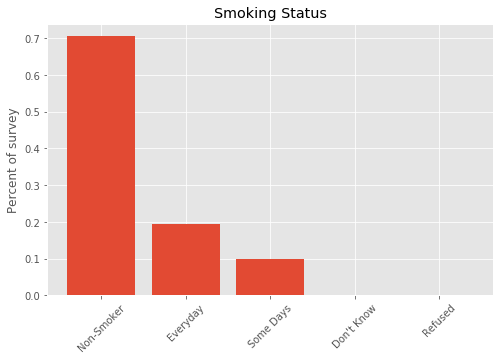

In [410]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots(figsize=(8,5))

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=45)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [332]:
# df.groupby(['_STATE', 'smoking'])['smoking'].count()

In [333]:
# df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})

# Generate graphics that show how the responses to this variable might differ by state.

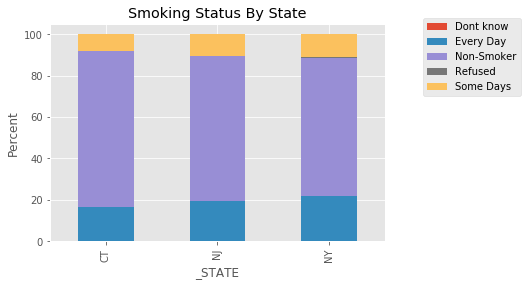

In [423]:
x = df.groupby('_STATE')['smoking_cat'].value_counts(normalize=True).unstack() * 100
fig,ax = plt.subplots()
x.plot.bar(stacked=True,ax=ax,)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylabel("Percent")
ax.set_title('Smoking Status By State')
plt.show()

In [424]:
# Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [418]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
Dont know     2.500000
Every Day     6.653007
Non-Smoker    4.581841
Refused       6.476190
Some Days     6.295659
Name: PHYSHLTH, dtype: float64

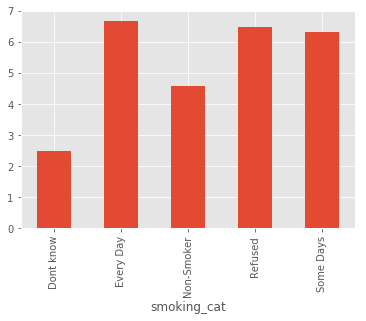

In [427]:
df.groupby('smoking_cat')['PHYSHLTH'].mean().plot(kind='bar')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

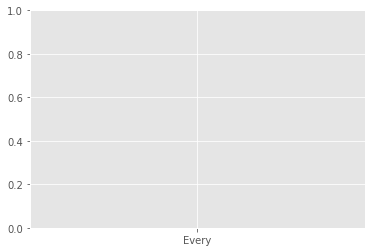

In [419]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Everyday', 'Non-Smoker',  'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [171]:
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)


In [173]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min(int((x-100)*4.34524), 30)
    else:
        return x

In [174]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [175]:
df['alcohol'].describe()

count    31532.000000
mean         5.437777
std          8.393684
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

KeyError: 'alcohol'

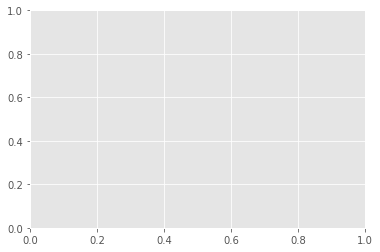

In [367]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [177]:
# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
CT    6.138136
NJ    5.006094
NY    5.241650
Name: alcohol, dtype: float64

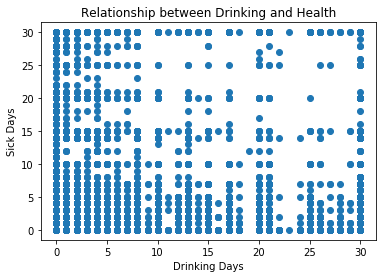

In [178]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [179]:
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.090125
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [434]:
1.96*(30/(1000)**0.5)

1.859419264179007

In [1]:
def t_test(sample, mu):
    mean = np.mean(sample)
    var = np.var(sample)
    sem = (var / len(sample)) ** .5
    t = abs(mu - mean)/sem
    df = len(sample) - 1
    p = scs.t.ppf(.95, df)
    return (t, p)